In [ ]:
zip_path = '/content/drive/My Drive/TFG/Validacion_Cruzada_304.zip'
extract_path = '/content/imagenes'
shutil.os.makedirs(extract_path, exist_ok=True)
extraer_archivo_zip(zip_path, extract_path)

Archivos extraídos correctamente en /content/imagenes


In [ ]:
!wger https://unexes-my.sharepoint.com/:f:/g/personal/mjaraarr_alumnos_unex_es/EpRej4m7zbJFj8Heap9z_hwBYe3F2EbvRPmAgsj68PHqlw?e=NhCSWJ

In [ ]:
for fold in range(2, 6):
    shutil.os.makedirs(f'/content/imagenes/Validacion_cruzada_304/Fold_{fold}/Training/Benign', exist_ok=True)
    shutil.os.makedirs(f'/content/imagenes/Validacion_cruzada_304/Fold_{fold}/Training/Actionable', exist_ok=True)
    shutil.os.makedirs(f'/content/imagenes/Validacion_cruzada_304/Fold_{fold}/Training/Cancer', exist_ok=True)
    shutil.os.makedirs(f'/content/imagenes/Validacion_cruzada_304/Fold_{fold}/Training/Normal', exist_ok=True)
    shutil.os.makedirs(f'/content/imagenes/Validacion_cruzada_304/Fold_{fold}/Validacion/Benign', exist_ok=True)
    shutil.os.makedirs(f'/content/imagenes/Validacion_cruzada_304/Fold_{fold}/Validacion/Actionable', exist_ok=True)
    shutil.os.makedirs(f'/content/imagenes/Validacion_cruzada_304/Fold_{fold}/Validacion/Cancer', exist_ok=True)
    shutil.os.makedirs(f'/content/imagenes/Validacion_cruzada_304/Fold_{fold}/Validacion/Normal', exist_ok=True)

In [ ]:
zip_path = '/content/drive/My Drive/TFG/Validacion_cruzada_304.zip'
extract_path = '/content/imagenes'
shutil.os.makedirs(extract_path, exist_ok=True)
extraer_archivo_zip(zip_path, extract_path)

Archivos extraídos correctamente en /content/imagenes


In [1]:
from google.colab import drive
from google.colab import files
import shutil
import zipfile

drive.mount('/content/drive')

def extraer_archivo_zip(zip_path, extract_path):
    try:
        with zipfile.ZipFile(zip_path, 'r') as archivo_zip:
            archivo_zip.extractall(path=extract_path)
            print(f'Archivos extraídos correctamente en {extract_path}')
    except zipfile.BadZipFile as e:
        print(f'Error: archivo ZIP inválido. {e}')
    except Exception as e:
        print(f'Ocurrió un error: {e}')

zip_path = '/content/drive/My Drive/TFG/Validacion_cruzada_304.zip'
extract_path = '/content/imagenes'
shutil.os.makedirs(extract_path, exist_ok=True)
extraer_archivo_zip(zip_path, extract_path)

zip_path = '/content/drive/My Drive/TFG/Test.zip'
extract_path = '/content/imagenes'
#shutil.os.makedirs(extract_path, exist_ok=True)
#extraer_archivo_zip(zip_path, extract_path)


# for fold in range(1, 6):
#     shutil.os.makedirs(f'/content/imagenes/Validacion_cruzada_304/Fold_{fold}/Training/Benign', exist_ok=True)
#     shutil.os.makedirs(f'/content/imagenes/Validacion_cruzada_304/Fold_{fold}/Training/Actionable', exist_ok=True)
#     shutil.os.makedirs(f'/content/imagenes/Validacion_cruzada_304/Fold_{fold}/Training/Cancer', exist_ok=True)
#     shutil.os.makedirs(f'/content/imagenes/Validacion_cruzada_304/Fold_{fold}/Training/Normal', exist_ok=True)
#     shutil.os.makedirs(f'/content/imagenes/Validacion_cruzada_304/Fold_{fold}/Validacion/Benign', exist_ok=True)
#     shutil.os.makedirs(f'/content/imagenes/Validacion_cruzada_304/Fold_{fold}/Validacion/Actionable', exist_ok=True)
#     shutil.os.makedirs(f'/content/imagenes/Validacion_cruzada_304/Fold_{fold}/Validacion/Cancer', exist_ok=True)
#     shutil.os.makedirs(f'/content/imagenes/Validacion_cruzada_304/Fold_{fold}/Validacion/Normal', exist_ok=True)

!pip install pydot
!apt-get install graphviz


import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import seaborn as sns
import pickle

from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, BackupAndRestore

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Flatten, MaxPooling2D, GlobalAveragePooling2D, Dense, Reshape, Concatenate, Lambda
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import model_to_dot, plot_model, Sequence
from IPython.display import SVG

from tensorflow.keras.metrics import Precision, Recall, AUC
from sklearn.metrics import matthews_corrcoef

from tensorflow.keras import backend as K, layers, models, optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

from sklearn.model_selection import cross_val_score, KFold
from tensorflow.keras.layers import Layer

class CombinedHistory:
    def __init__(self, combined_history):
        self.history = combined_history

def combine_histories(*histories):
    """
    Combina múltiples objetos History de Keras en uno solo.

    Args:
        *histories: Un número arbitrario de objetos History.

    Returns:
        combined_history_obj: Un objeto History combinado.
    """
    # Verifica que haya al menos dos historiales para combinar
    if len(histories) < 2:
        raise ValueError("Debe haber al menos dos historiales para combinar")

    # Inicializa el diccionario combinado con el primer historial
    combined_history = {}
    for key in histories[0].history.keys():
        combined_history[key] = histories[0].history[key]

    # Combina los historiales restantes
    for history in histories[1:]:
        for key in history.history.keys():
            combined_history[key] += history.history[key]

    combined_history_obj = CombinedHistory(combined_history)
    return combined_history_obj

Mounted at /content/drive
Archivos extraídos correctamente en /content/imagenes
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
!pip install pydot
!apt-get install graphviz

import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import seaborn as sns
import pickle

from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, BackupAndRestore

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Flatten, MaxPooling2D, GlobalAveragePooling2D, Dense, Reshape, Concatenate, Lambda
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import model_to_dot, plot_model, Sequence
from IPython.display import SVG

from tensorflow.keras.metrics import Precision, Recall, AUC
from sklearn.metrics import matthews_corrcoef

from tensorflow.keras import backend as K, layers, models, optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

from sklearn.model_selection import cross_val_score, KFold
from tensorflow.keras.layers import Layer

class CombinedHistory:
    def __init__(self, combined_history):
        self.history = combined_history

def combine_histories(*histories):
    """
    Combina múltiples objetos History de Keras en uno solo.

    Args:
        *histories: Un número arbitrario de objetos History.

    Returns:
        combined_history_obj: Un objeto History combinado.
    """
    # Verifica que haya al menos dos historiales para combinar
    if len(histories) < 2:
        raise ValueError("Debe haber al menos dos historiales para combinar")

    # Inicializa el diccionario combinado con el primer historial
    combined_history = {}
    for key in histories[0].history.keys():
        combined_history[key] = histories[0].history[key]

    # Combina los historiales restantes
    for history in histories[1:]:
        for key in history.history.keys():
            combined_history[key] += history.history[key]

    combined_history_obj = CombinedHistory(combined_history)
    return combined_history_obj

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


# Generador de datos

In [2]:
class MedicalImageDataGenerator(Sequence):
    def __init__(self, data_dir, indices=None, batch_size=32, shuffle=True):
        self.data_dir = data_dir
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.labels = {'Actionable': 0, 'Benign': 1, 'Cancer': 2, 'Normal': 3}
        self.classes = list(self.labels.keys())
        self.load_data()
        self.on_epoch_end()

    def load_data(self):
        self.data = []
        self.filepaths = []
        self.file_labels = []
        for label in self.classes:
            label_dir = os.path.join(self.data_dir, label)
            filenames = os.listdir(label_dir)
            for filename in filenames:
                filepath = os.path.join(label_dir, filename)
                self.data.append((filepath, self.labels[label]))
                self.filepaths.append(filepath)
                self.file_labels.append(self.labels[label])
        self.indexes = np.arange(len(self.data))

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __len__(self):
        return len(self.indexes) // self.batch_size

    def __getitem__(self, index):
        batch_indices = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        batch_filepaths = [self.filepaths[i] for i in batch_indices]
        batch_labels = [self.file_labels[i] for i in batch_indices]

        batch_images = []
        for filepath in batch_filepaths:
            array = np.load(filepath)
            batch_images.append(array)

        # Convertir etiquetas a formato one-hot
        batch_labels = to_categorical(batch_labels, num_classes=len(self.classes))

        return np.array(batch_images), batch_labels

Shape de images_batch: (2, 4, 304, 304, 1)


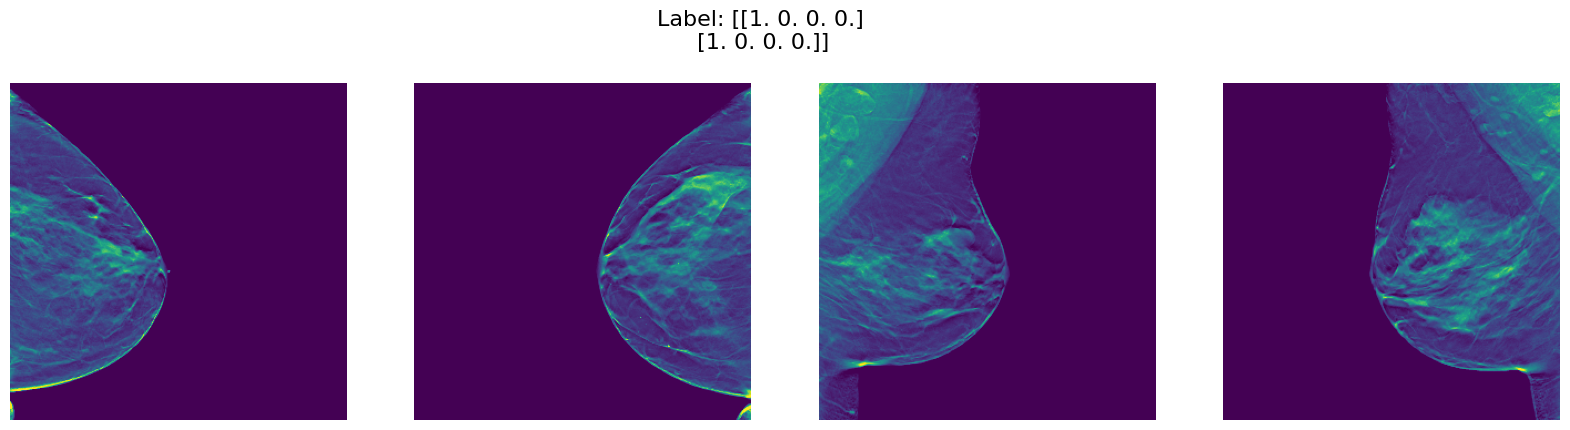

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [ ]:
directory = f'/content/imagenes/Validacion_Cruzada_304/Fold_{1}/Training'
batch_size = 12

data_gen = MedicalImageDataGenerator(directory,indices=None, batch_size=2, shuffle=False)

images_batch, labels_batch = data_gen[6]
# Imprimir la forma de los arrays
print(f'Shape de images_batch: {np.array(images_batch).shape}')
#print(f'Shape de labels_batch: {labels_batch.shape}')
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle(f'Label: {labels_batch}', fontsize=16)
for i in range(4):
    axes[i].imshow(images_batch[0][i].squeeze())
    axes[i].axis('off')
plt.show()
print(labels_batch)

In [ ]:
# Ejemplo de uso
directory = '/content/TFG/Division/Training'
batch_size = 1

data_gen = MedicalImageDataGenerator(directory, batch_size=batch_size, shuffle=False)
def show_all_images(data_gen):
    for i in range(len(data_gen)):
        images_batch, labels_batch = data_gen[i]
        print(f'Etiquetas del lote {i+1}: {labels_batch}')
        fig, axes = plt.subplots(1, 4, figsize=(20, 5))
        for i in range(4):
            axes[i].imshow(images_batch[i].squeeze(), cmap='gray')
            axes[i].axis('off')
        plt.show()


show_all_images(data_gen)

In [ ]:
directory = '/content/TFG/Division/Training'
batch_size = 20

data_gen = MedicalImageDataGenerator(directory, batch_size=batch_size, shuffle=False)

def show_all_labels(data_gen):
    for i in range(len(data_gen)):
        _, labels_batch = data_gen[i]
        print(f'Etiquetas del lote {i+1}: {labels_batch}')

show_all_labels(data_gen)

# Construcción del modelo

In [3]:
def weighted_categorical_crossentropy(weights):
    weights = tf.constant(weights, dtype=tf.float32)
    def loss(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.cast(y_pred, tf.float32)
        cross_entropy = categorical_crossentropy(y_true, y_pred)
        weights_tensor = tf.reduce_sum(weights * y_true, axis=-1)
        weighted_loss = cross_entropy * weights_tensor
        return tf.reduce_mean(weighted_loss)
    return loss

def unet_model(input_size=(4, 720, 720, 1), n_classes=4):
    inputs = layers.Input(input_size)
    print(f"inputs: {inputs.shape}")
    # Encoder
    conv1 = layers.Conv3D(16, 3, activation='relu', padding='same')(inputs)
    conv1 = layers.Conv3D(16, 3, activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling3D(pool_size=(1, 2, 2))(conv1)
    print(f"conv1: {conv1.shape}")

    conv2 = layers.Conv3D(32, 3, activation='relu', padding='same')(pool1)
    conv2 = layers.Conv3D(32, 3, activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling3D(pool_size=(1, 2, 2))(conv2)
    print(f"conv2: {conv2.shape}")

    conv3 = layers.Conv3D(64, 3, activation='relu', padding='same')(pool2)
    conv3 = layers.Conv3D(64, 3, activation='relu', padding='same')(conv3)
    pool3 = layers.MaxPooling3D(pool_size=(1, 2, 2))(conv3)
    print(f"conv3: {conv3.shape}")

    conv4 = layers.Conv3D(128, 3, activation='relu', padding='same')(pool3)
    conv4 = layers.Conv3D(128, 3, activation='relu', padding='same')(conv4)
    pool4 = layers.MaxPooling3D(pool_size=(1, 2, 2))(conv4)
    print(f"conv4: {conv4.shape}")

    # Bottleneck
    conv5 = layers.Conv3D(256, 3, activation='relu', padding='same')(pool4)
    conv5 = layers.Conv3D(256, 3, activation='relu', padding='same')(conv5)
    print(f"conv5: {conv5.shape}")

    # Decoder
    up6 = layers.Conv3DTranspose(128, 2, strides=(1, 2, 2), padding='same')(conv5)
    merge6 = layers.concatenate([conv4, up6], axis=4)
    conv6 = layers.Conv3D(128, 3, activation='relu', padding='same')(merge6)
    conv6 = layers.Conv3D(128, 3, activation='relu', padding='same')(conv6)
    print(f"conv6: {conv6.shape}")

    up7 = layers.Conv3DTranspose(64, 2, strides=(1, 2, 2), padding='same')(conv6)
    merge7 = layers.concatenate([conv3, up7], axis=4)
    conv7 = layers.Conv3D(64, 3, activation='relu', padding='same')(merge7)
    conv7 = layers.Conv3D(64, 3, activation='relu', padding='same')(conv7)
    print(f"conv7: {conv7.shape}")

    up8 = layers.Conv3DTranspose(32, 2, strides=(1, 2, 2), padding='same')(conv7)
    merge8 = layers.concatenate([conv2, up8], axis=4)
    conv8 = layers.Conv3D(32, 3, activation='relu', padding='same')(merge8)
    conv8 = layers.Conv3D(32, 3, activation='relu', padding='same')(conv8)
    print(f"conv8: {conv8.shape}")

    up9 = layers.Conv3DTranspose(16, 2, strides=(1, 2, 2), padding='same')(conv8)
    merge9 = layers.concatenate([conv1, up9], axis=4)
    conv9 = layers.Conv3D(16, 3, activation='relu', padding='same')(merge9)
    conv9 = layers.Conv3D(16, 3, activation='relu', padding='same')(conv9)
    conv9 = layers.Conv3D(n_classes, 1, activation='sigmoid')(conv9)
    print(f"conv9: {conv9.shape}")

    conv9 = layers.BatchNormalization()(conv9)
    print(f"conv9 después de BatchNormalization: {conv9.shape}")

    conv9 = layers.Dropout(0.1)(conv9)
    print(f"conv9 después de Dropout: {conv9.shape}")

    conv9 = layers.Conv3D(1, (3, 3, 3), strides=(2, 2, 2), padding='same', activation='relu')(conv9)
    print(f"conv9 después de Conv3D adicional: {conv9.shape}")
    conv9 = layers.Conv3D(1, (3, 3, 3), strides=(2, 2, 2), padding='same', activation='relu')(conv9)
    print(f"conv9 después de Conv3D adicional: {conv9.shape}")

    flatten_layer = layers.Flatten()(conv9)
    print(f"flatten_layer: {flatten_layer.shape}")

    output = Dense(4)(flatten_layer)
    output = layers.Activation('softmax')(output)

    model = models.Model(inputs, output)

    return model

input_size = (4, 304, 304, 1)
n_classes = 4

# Inicializar y compilar el modelo
model = unet_model(input_size=input_size, n_classes=n_classes)

# Compilar el modelo con Adam y weighted_categorical_crossentropy
optimizer = Adam(learning_rate=0.001)
#weights = np.array([168/600, 364/600, 364/600, 1.0], dtype=np.float32) # Pesos inversamente proporcionales al número de muestras en cada clase
peso_primera_etiqueta = 0
#frecuencias_restantes = [777, 896, 1672] # Con DA
frecuencias_restantes = [388, 896, 1284] # Sin DA
pesos_inversos = [peso_primera_etiqueta] + [1.0 / f for f in frecuencias_restantes]# Calcular la inversa de las frecuencias, asignando peso 0 a la primera etiqueta
suma_pesos_inversos = sum(pesos_inversos)
pesos_normalizados = [p / suma_pesos_inversos for p in pesos_inversos]# Normalizar los pesos
print(pesos_normalizados)
loss = weighted_categorical_crossentropy(pesos_normalizados)

precision = Precision()

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy', precision])

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Guardar una representación gráfica del modelo en un archivo
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
print("La representación gráfica del modelo se ha guardado en 'model_plot.png'.")

inputs: (None, 4, 304, 304, 1)
conv1: (None, 4, 304, 304, 16)
conv2: (None, 4, 152, 152, 32)
conv3: (None, 4, 76, 76, 64)
conv4: (None, 4, 38, 38, 128)
conv5: (None, 4, 19, 19, 256)
conv6: (None, 4, 38, 38, 128)
conv7: (None, 4, 76, 76, 64)
conv8: (None, 4, 152, 152, 32)
conv9: (None, 4, 304, 304, 4)
conv9 después de BatchNormalization: (None, 4, 304, 304, 4)
conv9 después de Dropout: (None, 4, 304, 304, 4)
conv9 después de Conv3D adicional: (None, 2, 152, 152, 1)
conv9 después de Conv3D adicional: (None, 1, 76, 76, 1)
flatten_layer: (None, 5776)
[0.0, 0.5762969968501791, 0.24955718167172936, 0.17414582147809152]
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 4, 304, 304, 1)]     0         []                            
                                                                   

# Entrenamiento

In [4]:
# Cargar el modelo guardado
model.load_weights(f"/content/drive/My Drive/TFG/UNet_fold_2_epoch_20_val_acc_0.7905.keras")

In [5]:
batch_size = 10
model_save_path = '/content'

# Entrenar el modelo
for fold in range(2, 4):
    print(f"Training fold {fold}/5")
    train_data_dir = f'/content/imagenes/Validacion_cruzada_304/Fold_{fold}/Training'
    val_data_dir = f'/content/imagenes/Validacion_cruzada_304/Fold_{fold}/Validacion'

    train_generator = MedicalImageDataGenerator(train_data_dir, indices=None, batch_size=batch_size)
    val_generator = MedicalImageDataGenerator(train_data_dir, indices=None, batch_size=batch_size, shuffle=False)


    checkpoint_filepath = f'{model_save_path}/best_model_fold_{fold}.keras'
    model_checkpoint_callback = ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True
    )

    class SaveModelPerEpoch(Callback):
        def on_epoch_end(self, epoch, logs=None):
            val_accuracy = logs.get('val_accuracy')

            val_accuracy_formatted = f"{val_accuracy:.4f}" if val_accuracy is not None else "NA" # Formateamos val_accuracy a 4 decimales para evitar nombres muy largos
            model_path = f"UNet_fold_{2}_epoch_{epoch + 21}_val_acc_{val_accuracy_formatted}.keras"
            self.model.save(model_path)

    save_model_per_epoch_callback = SaveModelPerEpoch()

    history = model.fit(train_generator,
                        validation_data=val_generator,
                        epochs=20,
                        steps_per_epoch=len(train_generator),
                        validation_steps=len(val_generator),
                        callbacks=[model_checkpoint_callback, save_model_per_epoch_callback])

    with open(f"{model_save_path}/UNet_fold_{fold}_epoch_21_40.pkl", 'wb') as file:
        pickle.dump(history.history, file)
    #model.save(f"{model_save_path}/UNet_fold_{fold}_epoch_50.keras")


Training fold 2/5
Epoch 1/20
  6/274 [..............................] - ETA: 5:06 - loss: 0.5618 - accuracy: 0.7000

274/274 [==============================] - 496s 2s/step - loss: 0.5877 - accuracy: 0.7591 - val_loss: 0.5192 - val_accuracy: 0.7854
Epoch 2/20
274/274 [==============================] - 459s 2s/step - loss: 0.5803 - accuracy: 0.7701 - val_loss: 0.5260 - val_accuracy: 0.7843
Epoch 3/20
274/274 [==============================] - 460s 2s/step - loss: 0.5887 - accuracy: 0.7620 - val_loss: 0.5210 - val_accuracy: 0.7974
Epoch 4/20
274/274 [==============================] - 457s 2s/step - loss: 0.5916 - accuracy: 0.7547 - val_loss: 0.5174 - val_accuracy: 0.7964
Epoch 5/20
274/274 [==============================] - 459s 2s/step - loss: 0.5855 - accuracy: 0.7599 - val_loss: 0.5161 - val_accuracy: 0.7960
Epoch 6/20
274/274 [==============================] - 459s 2s/step - loss: 0.5803 - accuracy: 0.7620 - val_loss: 0.5132 - val_accuracy: 0.7905
Epoch 7/20
274/274 [==============================] - 457s 2s/step - loss: 0.5683 - accuracy: 0.7664 - val_loss: 0.5102 - val_accuracy: 0.7974
Epoch 8/20

 81/274 [=======>......................] - ETA: 3:59 - loss: 0.6414 - accuracy: 0.7321

KeyboardInterrupt: 

In [ ]:
batch_size = 10
model_save_path = '/content'

# Entrenar el modelo
for fold in range(1, 6):
    print(f"Training fold {fold}/5")
    train_data_dir = f'/content/imagenes/Validacion_cruzada_304/Fold_{fold}/Training'
    val_data_dir = f'/content/imagenes/Validacion_cruzada_304/Fold_{fold}/Validacion'

    train_generator = MedicalImageDataGenerator(train_data_dir, indices=None, batch_size=batch_size)
    val_generator = MedicalImageDataGenerator(train_data_dir, indices=None, batch_size=batch_size, shuffle=False)


    checkpoint_filepath = f'{model_save_path}/best_model_fold_{fold}.keras'
    model_checkpoint_callback = ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True
    )

    # Callback para guardar el modelo en cada epoch
    class SaveModelPerEpoch(Callback):
        def on_epoch_end(self, epoch, logs=None):
            model_path = f"UNet_fold_{fold}_epoch_{epoch + 1}.keras"
            self.model.save(model_path)

    save_model_per_epoch_callback = SaveModelPerEpoch()

    history = model.fit(train_generator,
                        validation_data=val_generator,
                        epochs=10,
                        steps_per_epoch=len(train_generator),
                        validation_steps=len(val_generator),
                        callbacks=[model_checkpoint_callback])

    with open(f"{model_save_path}/UNet_fold_{fold}_epoch_50.pkl", 'wb') as file:
        pickle.dump(history.history, file)
    model.save(f"{model_save_path}/UNet_fold_{fold}_epoch_50.keras")

    history = model.fit(train_generator,
                        validation_data=val_generator,
                        epochs=10,
                        steps_per_epoch=len(train_generator),
                        validation_steps=len(val_generator),
                        callbacks=[model_checkpoint_callback, save_model_per_epoch_callback])

    with open(f"{model_save_path}/UNet_fold_{fold}_epoch_50.pkl", 'wb') as file:
        pickle.dump(history.history, file)
    model.save(f"{model_save_path}/UNet_fold_{fold}_epoch_50.keras")


Training fold 1/5
Epoch 1/10
274/274 [==============================] - 463s 2s/step - loss: 0.6086 - accuracy: 0.7529 - val_loss: 0.5450 - val_accuracy: 0.7814
Epoch 2/10
274/274 [==============================] - 471s 2s/step - loss: 0.6027 - accuracy: 0.7609 - val_loss: 0.5406 - val_accuracy: 0.7861
Epoch 3/10
274/274 [==============================] - 489s 2s/step - loss: 0.6124 - accuracy: 0.7522 - val_loss: 0.5550 - val_accuracy: 0.7730
Epoch 4/10
274/274 [==============================] - 472s 2s/step - loss: 0.6011 - accuracy: 0.7573 - val_loss: 0.5315 - val_accuracy: 0.7923
Epoch 5/10
274/274 [==============================] - 471s 2s/step - loss: 0.5944 - accuracy: 0.7511 - val_loss: 0.5416 - val_accuracy: 0.7777
Epoch 6/10
274/274 [==============================] - 492s 2s/step - loss: 0.5988 - accuracy: 0.7544 - val_loss: 0.5409 - val_accuracy: 0.7766
Epoch 7/10
274/274 [==============================] - 471s 2s/step - loss: 0.6077 - accuracy: 0.7595 - val_loss: 0.5534 - va

274/274 [==============================] - 472s 2s/step - loss: 0.5873 - accuracy: 0.7672 - val_loss: 0.5353 - val_accuracy: 0.7777
Epoch 2/10
 77/274 [=======>......................] - ETA: 4:12 - loss: 0.5601 - accuracy: 0.7610

In [ ]:
batch_size = 10
model_save_path = '/content'

# Entrenar el modelo
for fold in range(1, 6):
    print(f"Training fold {fold}/5")
    train_data_dir = f'/content/imagenes/Validacion_cruzada_304/Fold_{fold}/Training'
    val_data_dir = f'/content/imagenes/Validacion_cruzada_304/Fold_{fold}/Validacion'

    train_generator = MedicalImageDataGenerator(train_data_dir, indices=None, batch_size=batch_size)
    val_generator = MedicalImageDataGenerator(train_data_dir, indices=None, batch_size=batch_size, shuffle=False)


    checkpoint_filepath = f'{model_save_path}/best_model_fold_{fold}.keras'
    model_checkpoint_callback = ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True
    )

    # Callback para guardar el modelo en cada epoch
    # class SaveModelPerEpoch(Callback):
    #     def on_epoch_end(self, epoch, logs=None):
    #         model_path = f"UNet_fold_{fold}_epoch_{epoch + 1}.keras"
    #         self.model.save(model_path)

    # save_model_per_epoch_callback = SaveModelPerEpoch()

    history = model.fit(train_generator,
                        validation_data=val_generator,
                        epochs=13,
                        steps_per_epoch=len(train_generator),
                        validation_steps=len(val_generator),
                        callbacks=[model_checkpoint_callback])

    with open(f"{model_save_path}/UNet_fold_{fold}_epoch_50.pkl", 'wb') as file:
        pickle.dump(history.history, file)
    model.save(f"{model_save_path}/UNet_fold_{fold}_epoch_50.keras")


Training fold 1/5
Epoch 1/20
  6/274 [..............................] - ETA: 5:29 - loss: 1.2131 - accuracy: 0.4833

274/274 [==============================] - 544s 2s/step - loss: 0.7885 - accuracy: 0.7172 - val_loss: 0.9174 - val_accuracy: 0.7850
Epoch 2/20
274/274 [==============================] - 486s 2s/step - loss: 1.0355 - accuracy: 0.5650 - val_loss: 1.3345 - val_accuracy: 0.3270
Epoch 3/20
274/274 [==============================] - 450s 2s/step - loss: 1.2137 - accuracy: 0.4266 - val_loss: 1.1705 - val_accuracy: 0.4661
Epoch 4/20
274/274 [==============================] - 453s 2s/step - loss: 1.1666 - accuracy: 0.4708 - val_loss: 1.1759 - val_accuracy: 0.5507
Epoch 5/20
274/274 [==============================] - 454s 2s/step - loss: 1.1067 - accuracy: 0.5464 - val_loss: 1.0140 - val_accuracy: 0.6124
Epoch 6/20
274/274 [==============================] - 453s 2s/step - loss: 0.9758 - accuracy: 0.6230 - val_loss: 0.8764 - val_accuracy: 0.6668
Epoch 7/20
274/274 [==============================] - 448s 2s/step - loss: 0.8770 - accuracy: 0.6639 - val_loss: 0.8076 - val_accuracy: 0.6942
Epoch 8/20

274/274 [==============================] - 452s 2s/step - loss: 0.6842 - accuracy: 0.7252 - val_loss: 0.6626 - val_accuracy: 0.7412
Epoch 2/20
274/274 [==============================] - 448s 2s/step - loss: 0.6753 - accuracy: 0.7310 - val_loss: 0.6195 - val_accuracy: 0.7544
Epoch 3/20
274/274 [==============================] - 453s 2s/step - loss: 0.6718 - accuracy: 0.7336 - val_loss: 0.6282 - val_accuracy: 0.7398
Epoch 4/20
274/274 [==============================] - 453s 2s/step - loss: 0.6735 - accuracy: 0.7325 - val_loss: 0.6204 - val_accuracy: 0.7595
Epoch 5/20
274/274 [==============================] - 449s 2s/step - loss: 0.6628 - accuracy: 0.7442 - val_loss: 0.6386 - val_accuracy: 0.7354
Epoch 6/20
274/274 [==============================] - 448s 2s/step - loss: 0.6584 - accuracy: 0.7299 - val_loss: 0.5984 - val_accuracy: 0.7639
Epoch 7/20
274/274 [==============================] - 453s 2s/step - loss: 0.6598 - accuracy: 0.7336 - val_loss: 0.6220 - val_accuracy: 0.7478
Epoch 8/20

In [ ]:
batch_size = 6
model_save_path = '/content/drive/My Drive/Validacion_cruzada'

# Entrenar el modelo
for fold in range(1, 6):
    print(f"Training fold {fold}/5")
    train_data_dir = f'/content/imagenes/Validacion_cruzada_304/Fold_{fold}/Training'
    val_data_dir = f'/content/imagenes/Validacion_cruzada_304/Fold_{fold}/Validacion'

    train_generator = MedicalImageDataGenerator(train_data_dir, indices=None, batch_size=batch_size)
    val_generator = MedicalImageDataGenerator(train_data_dir, indices=None, batch_size=batch_size, shuffle=False)


    checkpoint_filepath = f'{model_save_path}/best_model_fold_{fold}.keras'
    model_checkpoint_callback = ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True
    )

    # Callback para guardar el modelo en cada epoch
    class SaveModelPerEpoch(Callback):
        def on_epoch_end(self, epoch, logs=None):
            model_path = f"UNet_fold_{fold}_epoch_{epoch + 1}.keras"
            self.model.save(model_path)

    save_model_per_epoch_callback = SaveModelPerEpoch()

    history = model.fit(train_generator,
                        validation_data=val_generator,
                        epochs=50,
                        steps_per_epoch=len(train_generator),
                        validation_steps=len(val_generator),
                        callbacks=[model_checkpoint_callback, save_model_per_epoch_callback])

    with open(f"{model_save_path}/UNet_fold_{fold}_epoch_1.pkl", 'wb') as file:
        pickle.dump(history.history, file)


Evaluación de los datos de Testeo:


InvalidArgumentError: Graph execution error:

Detected at node model_1/dense_1/MatMul defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 377, in dispatch_queue

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 250, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 748, in __init__

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-7-af9e582adfe3>", line 5, in <cell line: 5>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2296, in evaluate

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 4108, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1917, in test_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py", line 241, in call

Matrix size-incompatible: In[0]: [10,132710400], In[1]: [23658496,4]
	 [[{{node model_1/dense_1/MatMul}}]] [Op:__inference_test_function_2534]

Evaluación de los datos de Testeo:
85/85 [==============================] - 35s 417ms/step


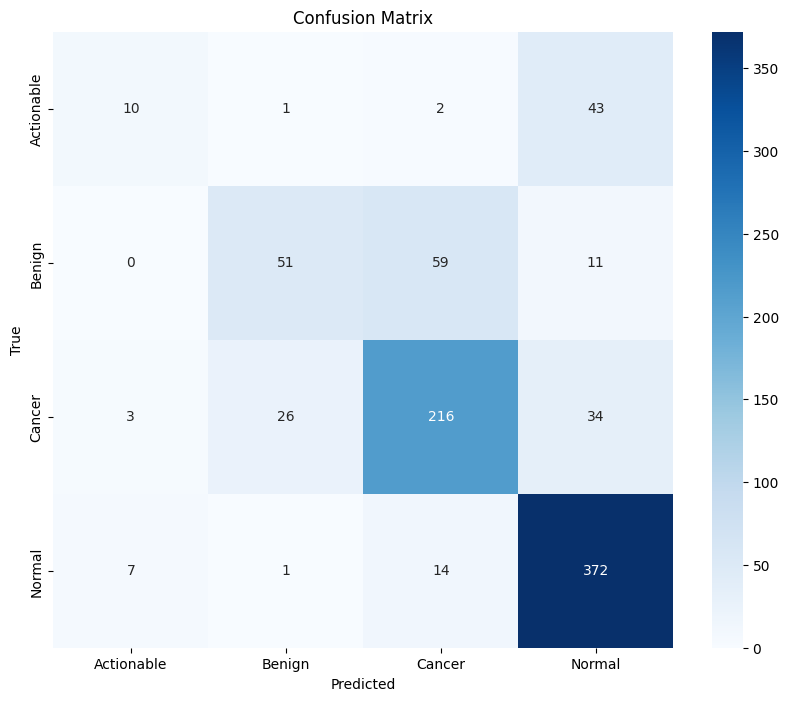

In [7]:
# Matriz de confusión
print("Evaluación de los datos de Testeo:")
test_data_dir = '/content/imagenes/Validacion_cruzada_304/Test'
test_generator = MedicalImageDataGenerator(test_data_dir, indices=None, batch_size=10, shuffle=False)
test_metrics = model.evaluate(test_generator, steps=len(test_generator))


y_pred_prob = model.predict(test_generator, steps=len(test_generator))
y_pred = np.argmax(y_pred_prob, axis=1)

# Obtener las etiquetas verdaderas del conjunto de prueba
y_true = []
for _, labels in test_generator:
    y_true.extend(labels)
y_true = np.array(y_true)

# Asegurarse de que y_true esté en formato categórico
if len(y_true.shape) > 1 and y_true.shape[1] > 1:
    y_true = np.argmax(y_true, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)

labels = ['Actionable', 'Benign', 'Cancer', 'Normal']
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()